In [1]:
import os
import pandas as pd
import Finalized_pipeline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### BACE classification 

In [35]:
results_bace_class = pd.read_csv("Merged runs\BACE_class.csv")
print(results_bace_class.iloc[1]['hyperparams'])
results_bace_class.head()

{'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.01, 'max_iter': 500, 'solver': 'sgd'}


,Unnamed: 0,model,hyperparams,roc_auc,train_roc_auc,accuracy,train_accuracy,precision,train_precision,recall,train_recall,f1,train_f1,split,preprocessing
0,16691,SVC,"{'C': 0.01, 'kernel': 'poly', 'gamma': 0.05}",0.880874,0.873432,0.881579,0.872153,0.887324,0.832268,0.863014,0.883051,0.875000,0.856908,0.9,Descriptors
1,17305,MLPClassifier,"{'hidden_layer_sizes': (50, 50), 'activation':...",0.876626,0.950669,0.875000,0.946363,0.837500,0.902022,0.917808,0.983051,0.875817,0.940795,0.9,DescFing
2,17306,LogisticRegression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.874025,0.920109,0.875000,0.919177,0.885714,0.890879,0.849315,0.927119,0.867133,0.908638,0.9,DescFing
3,16692,MLPClassifier,"{'hidden_layer_sizes': (100,), 'activation': '...",0.869256,0.889231,0.868421,0.884644,0.844156,0.829528,0.890411,0.923729,0.866667,0.874098,0.9,Descriptors
4,18904,MLPClassifier,"{'hidden_layer_sizes': (100,), 'activation': '...",0.867696,0.961201,0.868421,0.960323,0.873239,0.942244,0.849315,0.967797,0.861111,0.954849,0.9,Fingerprints


In [37]:
dataset_path = "..\split_datasets\split0.9_bace.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if True:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if False:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {'hidden_layer_sizes': [(50, 50)], 'activation': ['relu'], 'alpha': [0.01], 'max_iter': [500], 'solver': ['sgd']}, "gb": {}, "xg": {}, "sv": {}}
best_bace_class, X_test_bace_class = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_bace_class


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
overflow encountered in reduce                    
100%|██████████| 1513/1513 [03:05<00:00,  8.14it/s]


Regression:  False
dt
{}
time:  1.905477
0 0.7185711808565979 0.9891820000439666 0.7236842105263158 0.9904481998530492 0.7818181818181819 0.998272884283247 0.589041095890411 0.9796610169491525 0.671875 0.9888793840889649 DecisionTreeClassifier {}
rf
{}
time:  2.264435
1 0.841338650945032 0.9913704412055662 0.8421052631578947 0.9904481998530492 0.8450704225352113 0.9800332778702163 0.821917808219178 0.9983050847457627 0.8333333333333333 0.9890848026868179 RandomForestClassifier {}
lr
{}
time:  0.115852
2 0.8618865961505116 0.9643913913253754 0.8618421052631579 0.9632623071271125 0.8513513513513513 0.944078947368421 0.863013698630137 0.9728813559322034 0.8571428571428572 0.9582637729549248 LogisticRegression {}
nn
{'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.01, 'max_iter': 500, 'solver': 'sgd'}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


time:  15.365553
3 0.862406797294954 0.9675822726373409 0.8618421052631579 0.9662013225569435 0.8421052631578947 0.9459016393442623 0.8767123287671232 0.9779661016949153 0.8590604026845637 0.9616666666666667 MLPClassifier {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'alpha': 0.01, 'max_iter': 500, 'solver': 'sgd'}
gb
{}
time:  48.577655
4 0.8271198196636034 0.9571105102332432 0.8289473684210527 0.9559147685525349 0.8507462686567164 0.9344262295081968 0.7808219178082192 0.9661016949152542 0.8142857142857143 0.95 GradientBoostingClassifier {}
xg
{}
time:  4.355829
5 0.8070920756025664 0.9903756952230209 0.8092105263157895 0.9904481998530492 0.8333333333333334 0.988155668358714 0.7534246575342466 0.9898305084745763 0.7913669064748201 0.9889923793395429 XGBClassifier {}
sv
{}
time:  2.105403
6 0.8218311080284377 0.8639550220932534 0.8223684210526315 0.8618662747979426 0.8194444444444444 0.8160377358490566 0.8082191780821918 0.8796610169491526 0.8137931034482759 0.8466557911908645

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500,
              solver='sgd')

### BACE regression

In [38]:
results_bace_reg = pd.read_csv("Merged runs\BACE_regre.csv")
print(results_bace_reg[results_bace_reg['split'] == 0.9].iloc[0]['hyperparams'])
results_bace_reg[results_bace_reg['split'] == 0.9].head()

{'max_depth': 3, 'eta': 0.2, 'gamma': 0.01}


,Unnamed: 0,model,hyperparams,mse,train_mse,rmse,train_rmse,mae,train_mae,r2,train_r2,split,preprocessing
14,27622,XGBRegressor,"{'max_depth': 3, 'eta': 0.2, 'gamma': 0.01}",0.432818,0.230621,0.657889,0.480230,0.517433,0.383379,0.762539,0.871754,0.9,DescFing
15,27623,XGBRegressor,"{'max_depth': 3, 'eta': 0.2, 'gamma': 0}",0.432818,0.229385,0.657889,0.478941,0.517433,0.382582,0.762539,0.872441,0.9,DescFing
17,27621,MLPRegressor,"{'hidden_layer_sizes': (100,), 'activation': '...",0.438130,0.243177,0.661914,0.493130,0.493273,0.388153,0.759625,0.864771,0.9,DescFing
20,27620,SVR,"{'C': 10, 'kernel': 'rbf', 'epsilon': 0.1, 'ga...",0.440131,0.180849,0.663424,0.425263,0.497488,0.314095,0.758527,0.899431,0.9,DescFing
22,27619,GradientBoostingRegressor,"{'max_depth': 3, 'loss': 'squared_error', 'n_e...",0.442398,0.311927,0.665130,0.558504,0.519427,0.450206,0.757283,0.826540,0.9,DescFing


In [40]:
dataset_path = "..\split_datasets\split0.9_bace.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if False:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if True:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {}, "gb": {}, "xg": {'max_depth': [3], 'eta': [0.2], 'gamma': [0.01]}, "sv": {}}
best_bace_regr, X_test_bace_regr = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_bace_regr


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
overflow encountered in reduce                    
100%|██████████| 1513/1513 [02:58<00:00,  8.46it/s]


Regression:  True
dt
{}
time:  2.05791
0 1.026561280422103 0.14672179427675106 1.0538280624618674 0.02152728491578926 0.7006520855263156 0.0237698654665687 0.4218284034135229 0.9880288556534029 DecisionTreeRegressor {}
rf
{}
time:  137.821058
1 0.6940301978918798 0.3073705278582466 0.48167791558584183 0.09447664139585714 0.5326178448574399 0.21899906078632847 0.7357325170824157 0.947462324396424 RandomForestRegressor {}
lr
{}
time:  0.986569
2 7599974.448642656 0.14672179427884802 57759611620021.25 0.0215272849164046 4686175.085807521 0.023770474964207713 -31689198701491.08 0.9880288556530608 LinearRegression {}
nn
{}
time:  12.11987
3 0.8249684206068012 0.25875891513414506 0.6805728949984801 0.06695617616139968 0.5801823321021353 0.17724777407215034 0.6266108947834266 0.9627662265418152 MLPRegressor {}
gb
{}
time:  49.930353
4 0.6619753125749419 0.47831008837044403 0.43821131445869205 0.22878054063694198 0.5151292571370039 0.3794418057036466 0.7595800070734893 0.8727770414907927 Gradi

SVR()

### ROR classification

In [31]:
results_ror_class = pd.read_csv("Merged runs\ROR_class.csv")
print(results_ror_class.iloc[0]['hyperparams'])
results_ror_class.head()

{'max_depth': 7, 'loss': 'exponential', 'n_estimators': 100, 'learning_rate': 1.0, 'min_impurity_decrease': 0.1}


,Unnamed: 0,model,hyperparams,roc_auc,train_roc_auc,accuracy,train_accuracy,precision,train_precision,recall,train_recall,f1,train_f1,split,preprocessing
0,17429,GradientBoostingClassifier,"{'max_depth': 7, 'loss': 'exponential', 'n_est...",0.800051,0.982575,0.803653,0.983732,0.778947,0.983668,0.770833,0.976309,0.774869,0.979975,0.9,Descriptors
1,17097,MLPClassifier,"{'hidden_layer_sizes': (50, 50), 'activation':...",0.784807,0.889022,0.776256,0.875445,0.700855,0.782168,0.854167,0.962594,0.769953,0.863052,0.9,DescFing
2,17098,GradientBoostingClassifier,"{'max_depth': 7, 'loss': 'exponential', 'n_est...",0.783283,0.983352,0.789954,0.983732,0.777778,0.978856,0.729167,0.981297,0.752688,0.980075,0.9,DescFing
3,15689,MLPClassifier,"{'hidden_layer_sizes': (50, 50), 'activation':...",0.778963,0.785205,0.767123,0.765125,0.682927,0.655393,0.875000,0.894015,0.767123,0.756329,0.9,Descriptors
4,17099,MLPClassifier,"{'hidden_layer_sizes': (50,), 'activation': 'l...",0.778074,0.979417,0.785388,0.980681,0.775281,0.979899,0.718750,0.972569,0.745946,0.976220,0.9,DescFing


In [45]:
dataset_path = "..\split_datasets\split0.9_ROR_data_1.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if True:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if False:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=True, calculate_fingerprints=False, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {}, "lr": {}, "nn": {}, "gb": {'max_depth': [7], 'loss': ['exponential'], 'n_estimators': [100], 'learning_rate': [1.0], 'min_impurity_decrease': [0.1]}, "xg": {}, "sv": {}}
best_ror_class, X_test_ror_class = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_ror_class


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 2186/2186 [04:58<00:00,  7.32it/s]


Regression:  False
dt
{}
time:  2.72794
0 0.7003302845528456 0.9810211595474833 0.7031963470319634 0.983731570920183 0.6565656565656566 0.9935897435897436 0.6770833333333334 0.9663341645885287 0.6666666666666666 0.9797724399494311 DecisionTreeClassifier {}
rf
{}
time:  5.211493
1 0.7126524390243901 0.9825752143247033 0.726027397260274 0.983731570920183 0.725 0.9836683417085427 0.6041666666666666 0.9763092269326683 0.6590909090909091 0.9799749687108886 RandomForestClassifier {}
lr
{}
time:  0.075961
2 0.6935975609756097 0.7562156839660504 0.7123287671232876 0.7742755465175394 0.7323943661971831 0.7564469914040115 0.5416666666666666 0.6583541147132169 0.6227544910179641 0.704 LogisticRegression {}
nn
{}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


time:  3.047085
3 0.7416158536585367 0.7877264992026372 0.7534246575342466 0.7966446365022878 0.7560975609756098 0.7563775510204082 0.6458333333333334 0.7394014962593516 0.6966292134831461 0.7477931904161411 MLPClassifier {}
gb
{'max_depth': 7, 'loss': 'exponential', 'n_estimators': 100, 'learning_rate': 1.0, 'min_impurity_decrease': 0.1}
time:  60.784489
4 0.7362804878048781 0.9825752143247033 0.7397260273972602 0.983731570920183 0.7010309278350515 0.9836683417085427 0.7083333333333334 0.9763092269326683 0.7046632124352332 0.9799749687108886 GradientBoostingClassifier {'max_depth': 7, 'loss': 'exponential', 'n_estimators': 100, 'learning_rate': 1.0, 'min_impurity_decrease': 0.1}
xg
{}
time:  3.014928
5 0.7212906504065041 0.9833522417133131 0.730593607305936 0.983731570920183 0.7126436781609196 0.9788557213930348 0.6458333333333334 0.9812967581047382 0.6775956284153006 0.9800747198007472 XGBClassifier {}
sv
{}
time:  1.508337
6 0.6416412601626016 0.6943371185769481 0.6757990867579908 0

MLPClassifier()

### ROR regression

In [30]:
results_ror_reg = pd.read_csv("Merged runs\ROR_regre.csv")
print(results_ror_reg.iloc[0]['hyperparams'])
results_ror_reg.head()

{'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 10}


,Unnamed: 0,model,hyperparams,mse,train_mse,rmse,train_rmse,mae,train_mae,r2,train_r2,split,preprocessing
0,25999,RandomForestRegressor,"{'max_depth': 20, 'min_samples_split': 10, 'mi...",0.413308,0.209439,0.642890,0.457645,0.511838,0.356041,0.541895,0.773114,0.9,Fingerprints
1,25998,SVR,"{'C': 0.01, 'kernel': 'poly', 'epsilon': 0.1, ...",0.414449,0.104092,0.643777,0.322633,0.479853,0.189299,0.540630,0.887237,0.9,Fingerprints
2,25997,SVR,"{'C': 0.1, 'kernel': 'poly', 'epsilon': 0.1, '...",0.415705,0.085548,0.644752,0.292486,0.481329,0.171705,0.539238,0.907326,0.9,Fingerprints
3,25996,SVR,"{'C': 0.01, 'kernel': 'poly', 'epsilon': 0.01,...",0.417877,0.103410,0.646434,0.321575,0.479184,0.137450,0.536830,0.887975,0.9,Fingerprints
4,25995,SVR,"{'C': 0.1, 'kernel': 'poly', 'epsilon': 0.01, ...",0.420804,0.083872,0.648694,0.289607,0.480284,0.114872,0.533586,0.909141,0.9,Fingerprints


In [46]:
dataset_path = "..\split_datasets\split0.9_ROR_data_1.csv"

df = pd.read_csv(dataset_path)

if not "pIC50" in df.columns:
    df = Finalized_pipeline.calculate_pIC50(df, "target")

if False:
    df = Finalized_pipeline.calculate_classification_labels(df, "pIC50", threshold=7)
    target_column = "label"
else:
    target_column = "pIC50"

if "mol" in df.columns:
    df.rename(columns={"mol": "SMILES"}, inplace=True)
    
if True:
    runtype = "regression"
else:
    runtype = "classification"

df = Finalized_pipeline.calculate_features(df, calculate_descriptors=False, calculate_fingerprints=True, 
                                                SMILES_column_name="SMILES", target_column_name=target_column, 
                                                split_column_name="Split")

hyperparams = {"dt": {}, "rf": {'max_depth': [20], 'min_samples_split': [10], 'min_samples_leaf': [1], 'min_impurity_decrease': [0], 'n_estimators': [10]}, "lr": {}, "nn": {}, "gb": {}, "xg": {}, "sv": {}}
best_ror_regr, X_test_ror_regr = Finalized_pipeline.hyperparameter_search(df, hyperparams, output_file_name="scrap.csv")
best_ror_regr


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Regression:  True
dt
{}
time:  0.221398
0 0.8448778481811399 0.11786485138027006 0.7138185783471932 0.01389212319089315 0.6124637459385408 0.025595454634442013 0.20881244673502897 0.9849506028750985 DecisionTreeRegressor {}
rf
{'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 10}
time:  0.795094
1 0.6658611220977826 0.4840536573482212 0.44337103392131816 0.23430794319218914 0.524097111114301 0.3770358186526594 0.5085731106508856 0.7461731919473853 RandomForestRegressor {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'n_estimators': 10}
lr
{}
time:  1.084725
2 3379371995.361556 0.204176557089435 1.1420155083033946e+19 0.041688066464895306 1615826406.5465088 0.09472795625338665 -1.265795656225887e+19 0.9548391373313785 LinearRegression {}
nn
{}


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


time:  11.351452
3 0.9356351368914069 0.2188439578611171 0.8754131093858016 0.047892677892318394 0.6891492503082975 0.13018095076095046 0.029703096668139084 0.9481176549421204 MLPRegressor {}
gb
{}
time:  2.242534
4 0.7142820936902414 0.6209238530440094 0.5101989093665149 0.38554643127901866 0.5770570800264107 0.49326908267725605 0.4345019322489354 0.5823358838186738 GradientBoostingRegressor {}
xg
{}
time:  0.772377
5 0.7101856377992363 0.34265393119577664 0.504363640136308 0.11741171656392003 0.5484996138512059 0.25791024516153016 0.4409696714265563 0.8728073797355087 XGBRegressor {}
sv
{}
time:  2.891131
6 0.6512130446000342 0.45522604819619605 0.4240784294572461 0.2072307549563254 0.4930048558701441 0.29295612848940966 0.5299567913017607 0.7755060270502553 SVR {}


SVR()

In [7]:
import shap

In [51]:
explainer = shap.KernelExplainer(best_bace_class.predict, X_test_bace_class)
shap_values = explainer.shap_values(X_test_bace_class)
shap.summary_plot(shap_values, X_test_bace_class)

Using 152 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  1%|          | 1/152 [01:50<4:38:54, 110.82s/it]


KeyboardInterrupt: 

In [12]:
explainer = shap.KernelExplainer(best_bace_regr.predict, X_test_bace_regr[:20])
shap_values = explainer.shap_values(X_test_bace_regr[:20])
shap.summary_plot(shap_values, X_test_bace_regr[:20])

 30%|███       | 6/20 [05:23<12:34, 53.89s/it]


KeyboardInterrupt: 

In [14]:
best_ror_class

RandomForestClassifier()

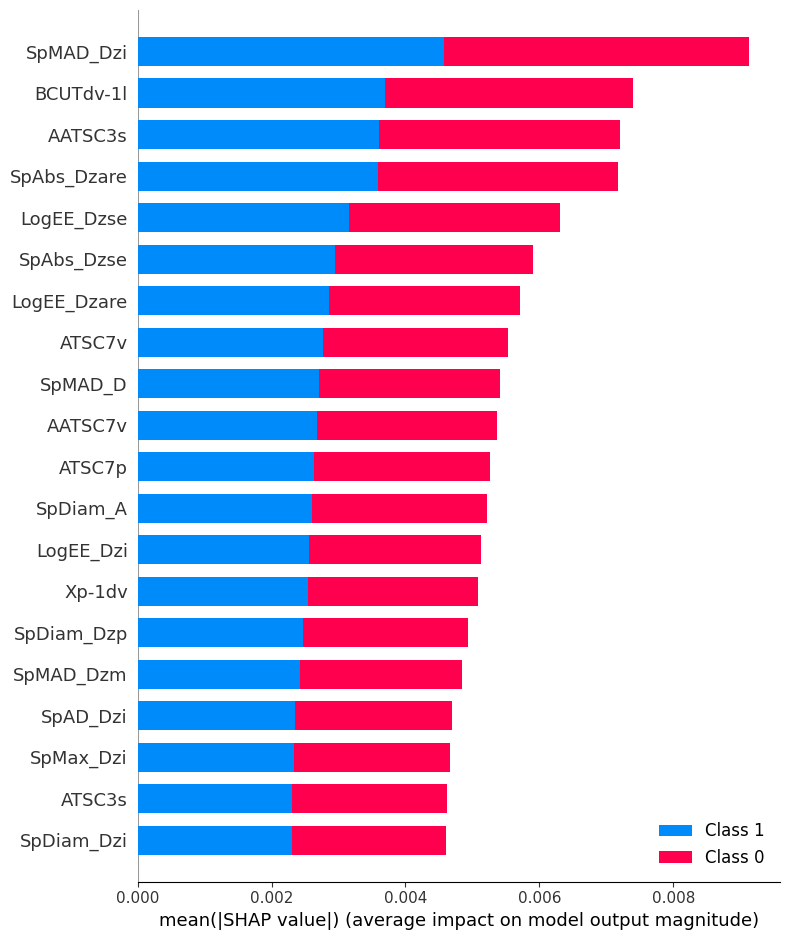

In [42]:
explainer = shap.TreeExplainer(best_ror_class)
shap_values = explainer.shap_values(X_test_ror_class)
shap.summary_plot(shap_values, X_test_ror_class)

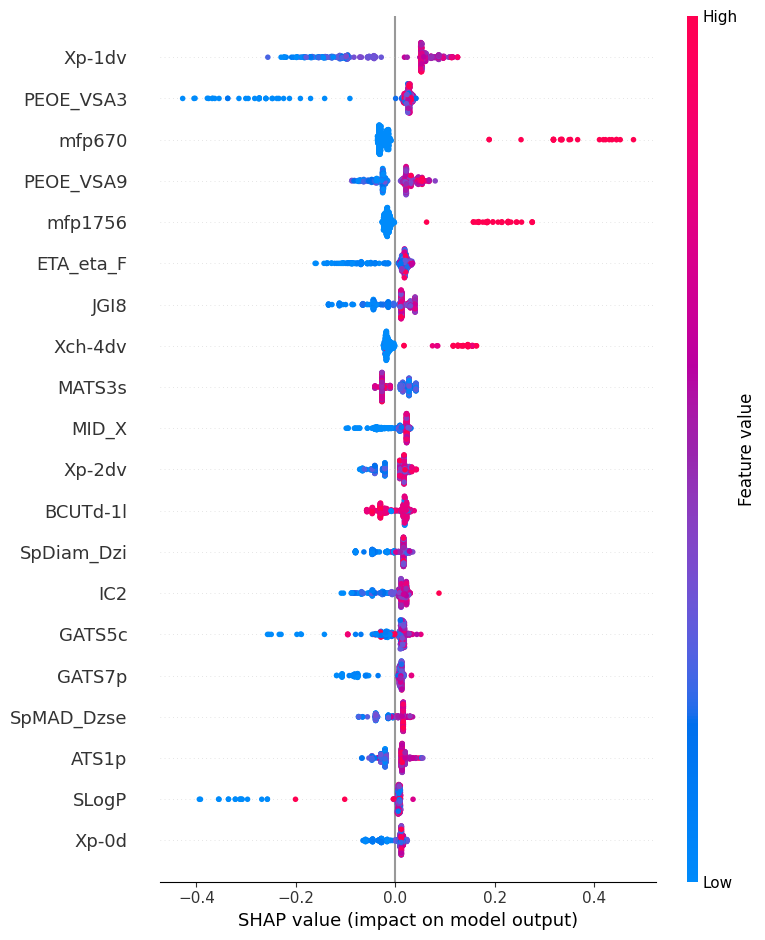

In [41]:
explainer = shap.TreeExplainer(best_ror_regr)
shap_values = explainer.shap_values(X_test_ror_regr)
shap.summary_plot(shap_values, X_test_ror_regr)